In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, hamming_loss, precision_score, recall_score, 
    f1_score, classification_report
)
from sklearn.multioutput import MultiOutputClassifier
import pandas as pd
import numpy as np

# Load the data
file_path = r"C:\Users\Muralish\Desktop\GemAppraisal-DSGP\notebook\Notebook-Norman\Datset used\final_merged.csv"
df = pd.read_csv(file_path)

# Split data into features (X) and target (y)
X = df.iloc[:, 92:110].values  # Features
y = df.iloc[:, 1:92].values  # Targets (binary multi-label data)

# Fill NaN values in target columns with 0
y = np.nan_to_num(y, nan=0)

# First split: Separate test set (30%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Separate train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize MultiOutputClassifier with RandomForest 
multi_output_model = MultiOutputClassifier(
    estimator=RandomForestClassifier(random_state=42), n_jobs=-1
)

# Train the model
multi_output_model.fit(X_train, y_train)

# Function to evaluate the model
def evaluate_model(X, y, dataset_name):
    y_pred = multi_output_model.predict(X)
    
    # Compute evaluation metrics
    hamming = hamming_loss(y, y_pred)
    precision = precision_score(y, y_pred, average='micro', zero_division=1)
    recall = recall_score(y, y_pred, average='micro', zero_division=1)
    f1 = f1_score(y, y_pred, average='micro', zero_division=1)
    subset_accuracy = accuracy_score(y, y_pred)

    # Classification report
    report = classification_report(y, y_pred, zero_division=1)
    
    print(f"{dataset_name} Hamming Loss: {hamming}")
    print(f"{dataset_name} Precision: {precision}")
    print(f"{dataset_name} Recall: {recall}")
    print(f"{dataset_name} F1 Score: {f1}")
    print(f"{dataset_name} Subset Accuracy: {subset_accuracy}")
    print("\nClassification Report:\n")
    print(report)
    print("=" * 80)

# Evaluate on training, validation, and test sets
evaluate_model(X_train, y_train, "Training")
evaluate_model(X_val, y_val, "Validation")
evaluate_model(X_test, y_test, "Testing")


Training Hamming Loss: 0.0001336553959409208
Training Precision: 0.9993921184209
Training Recall: 0.9981415611349918
Training F1 Score: 0.9987664483218364
Training Subset Accuracy: 0.9968107360455413

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16068
           1       1.00      1.00      1.00       201
           2       1.00      0.99      1.00       193
           3       1.00      1.00      1.00      1081
           4       1.00      1.00      1.00       866
           5       1.00      0.99      1.00       186
           6       1.00      1.00      1.00      6670
           7       1.00      1.00      1.00     12940
           8       1.00      1.00      1.00      5940
           9       1.00      1.00      1.00      1233
          10       1.00      1.00      1.00      1882
          11       1.00      1.00      1.00       367
          12       1.00      1.00      1.00     11988
          13      

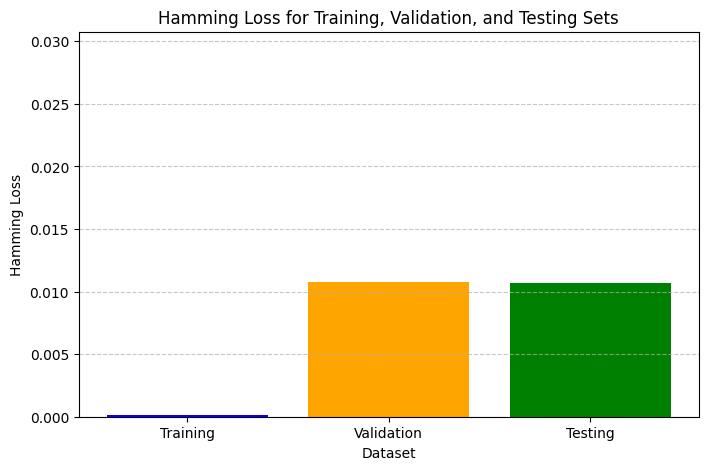

In [3]:
from sklearn.metrics import hamming_loss
import matplotlib.pyplot as plt

# Compute Hamming Loss for each dataset
hamming_train = hamming_loss(y_train, multi_output_model.predict(X_train))
hamming_val = hamming_loss(y_val, multi_output_model.predict(X_val))
hamming_test = hamming_loss(y_test, multi_output_model.predict(X_test))

# Define datasets
datasets = ["Training", "Validation", "Testing"]
hamming_losses = [hamming_train, hamming_val, hamming_test]

# Plot the Hamming Loss
plt.figure(figsize=(8, 5))
plt.bar(datasets, hamming_losses, color=['blue', 'orange', 'green'])
plt.xlabel("Dataset")
plt.ylabel("Hamming Loss")
plt.title("Hamming Loss for Training, Validation, and Testing Sets")
plt.ylim(0, max(hamming_losses) + 0.02)  # Add some padding to y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
